# <center><span style="color:#0071bc">Case Study | Cyclistic Bike-Share Analysis</span></center>

### <center><span style="color:#0071bc">Capstone Project of the Google Data Analytics Professional Certificate in R</span></center>

## <span style="color:#0071bc">Table of Contents</span>

* [1. Introduction](#introduction)
* [2. Ask](#ask)
    * [2.1 The business task](#business_task)
    * [2.2 Key stakeholders](#key_stakeholder)
* [3. Prepare](#prepare)
    * [3.1 Data source](#data_source)
        * [3.1.1 Accessibility and privacy](#data_privacy)
        * [3.1.2 Data organization](#data_organization)
    * [3.2 Loading packages](#loading)
    * [3.3 Importing the data](#importing)   
    * [3.4 Exploring the data](#exploring)
* [4. Process](#process)
    * [4.1 Data cleaning and formatting](#cleaning)
    * [4.2 Data manipulation](#manipulation)
* [5. Analyze and Share](#analyze)
    * [5.1 Share of rides by rider type](#share_rider_type)
    * [5.2 Popular bike type](#popular)
    * [5.3 Ride duration](#duration)
    * [5.4 Price strategy](#price)
    * [5.5 Rides by month](#rides_month)
    * [5.6 Rides by day of the week](#rides_dow)    
    * [5.7 Rides by hour of the day](#rides_hour)  
    * [5.8 Rides heatmap](#rides_heatmap)
    * [5.9 Rides by station](#rides_station)
* [6. Act & Recommendations](#act)


<a id="introduction"></a>
## <span style="color:#0071bc"> 1. Introduction </span> 

Cyclistic, a bike-share company in Chicago that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

Note: Cyclistic is a fictional company created for this case study only.

<a id="ask"></a>
## <span style="color:#0071bc">2. Ask</span>

<a id="business_task"></a>
### 2.1 The business task

The Marketing Director believes that the future success of the company depends on maximizing the number of annual memberships. Therefore the marketing analyst team wants to see how the Cyclistic bikes are used differently by casual riders and annual members. At last, the team will devise a new marketing strategy to turn casual riders into annual members.

As a junior data analyst working in the marketing analyst team, I will assist my team to analyze the data and provide recommendations that are backed up with compelling data insights and professional data visualizations.

<a id="key_stakeholder"></a>
### 2.2 Key stakeholders

- **Lily Moreno:** The director of marketing and my manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include email, social media, and other channels.
- **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. I joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how I can help Cyclistic
achieve them.
- **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.

<a id="prepare"></a>
## <span style="color:#0071bc">3. Prepare</span>

<a id="data_source"></a>
### 3.1 Data source

We will use Cyclistic’s trip data of the previous 12 months to analyze and identify trends. The data can be downloaded [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

<a id="data_privacy"></a>
#### 3.1.1 Accessibility and privacy

The data has been made available by Motivate International Inc, under this [data license agreement](https://ride.divvybikes.com/data-license-agreement). Since it's public data, we can use it to explore how different customer types are using Cyclistic bikes.

On the other hand, data-privacy issues prohibit us from using riders’ personally identifiable information. This means that we won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

<a id="data_organization"></a>
#### 3.1.2 Data organization

Each month's data is on its own zip file, we will need to download the 12 zip files from `202105-divvy-tripdata.zip` to `202204-divvy-tripdata.zip`.

Each zip file contains one csv file, there is no metadata to explain the columns, but their names are starightforward. Here is the list of columns:
- `ride_id`: The identifier of each ride
- `rideable_type`: The bike Type   
- `started_at`: Time the ride started, in the format of `%Y-%m-%d %H:%M:%S`
- `ended_at`: Time the ride ended, same format    
- `start_station_name`: The start station's name
- `start_station_id`: The start station's identifier
- `end_station_name`: The end station's name    
- `end_station_id`: The end station's identifier
- `start_lat`: The start station's latitude
- `start_lng`: The start station's longitude
- `end_lat`: The end station's latitude
- `end_lng`: The end station's longitude
- `member_casual`: The rider type, "member" and "casual" represent annual members and casual riders. respectively.



<a id="loading"></a>
### 3.2 Loading packages

Make sure to install new packages before loading them, here we can skip the installation as it has been done before.

In [58]:
library(tidyverse) # a collection of essential R packages for data science
library(ggmice) # visualizing missing values
library(lubridate) # dealing with dates
library(repr) # providing options to resize plots
library(scales) #scaling used by ggplots
library(sf) # encoding spatial data
library(ggmap) # visualizing maps
library(gridExtra) # working with grid graphics  

# for clean output, quit the message showing the guessed column types 
options(readr.show_col_types = FALSE)

# set default theme options
theme_set(
  theme_minimal() + 
  theme(    
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    strip.text = element_text(size = 14)
  )
)

<a id="importing"></a>
### 3.3 Importing the data 

All the csv files will be combined and imported into one dataframe.

In [59]:
data_all <- list.files(path = "Bike-Share-Data",pattern = "*.csv", full.names = TRUE) %>% 
  lapply(read_csv) %>%
  bind_rows

In [60]:
# check the first 6 rows
head(data_all)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,NA,NA,NA,NA,41.90,-87.63,41.89,-87.61,casual
DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,NA,NA,NA,NA,41.88,-87.62,41.79,-87.58,casual
0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,NA,NA,NA,NA,41.92,-87.70,41.92,-87.70,casual
7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,NA,NA,NA,NA,41.92,-87.70,41.94,-87.69,casual
853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,NA,NA,NA,NA,41.94,-87.69,41.94,-87.70,casual
F5E63DFD96B2A737,electric_bike,2021-05-30 11:33:41,2021-05-30 11:57:17,NA,NA,NA,NA,41.88,-87.63,41.89,-87.62,casual


We've known each column's data type from the above tibble, `started_at` and `ended_at` are datetime objects, so there is no need to convert them.

<a id="exploring"></a>
### 3.4 Exploring the data

#### Data size
First of all, let's check the dimensions of the dataset.

In [107]:
dim(data_all)

[1] 5757551      13

It has 13 columns, around 5.7 million rows, that's a large dataset.
Next, let's explore the amount of missing values of each column.

#### Check missing values

In [62]:
print(colSums(is.na(data_all)))

           ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            790207             790204             843361             843361 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4766               4766 
     member_casual 
                 0 


There are 4 columns that have about 800k missing values and they are all related to stations, the total number of missing values depends on how many of them are coincident. Let's visualize them and see if they are from same rows.

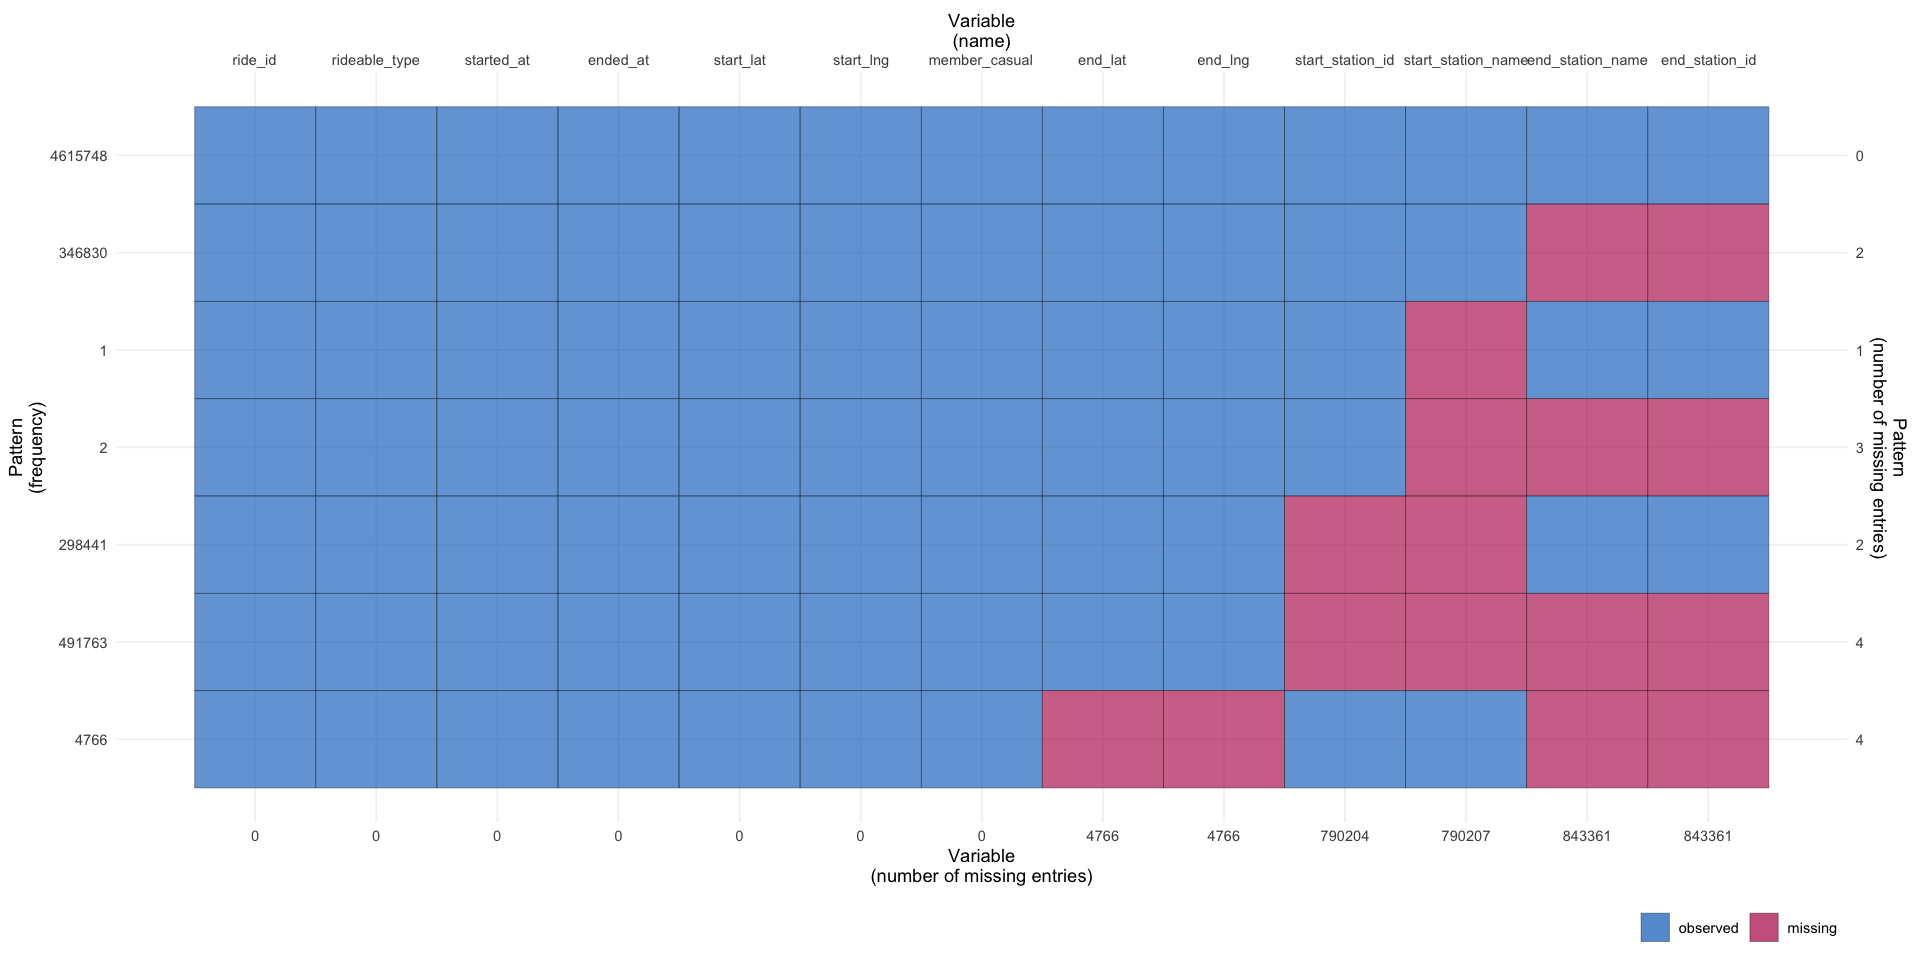

In [15]:
options(repr.plot.width = 16, repr.plot.height = 8)
plot_pattern(data_all)

They are partially coincident. There are about 1.1 million rows that have at least one missing value, that's about 20% of the dataset, can we remove them? Will it cause bias? To answer such questions, let's check the distribution of those rows, first of all, let's start with `rideable_type`.

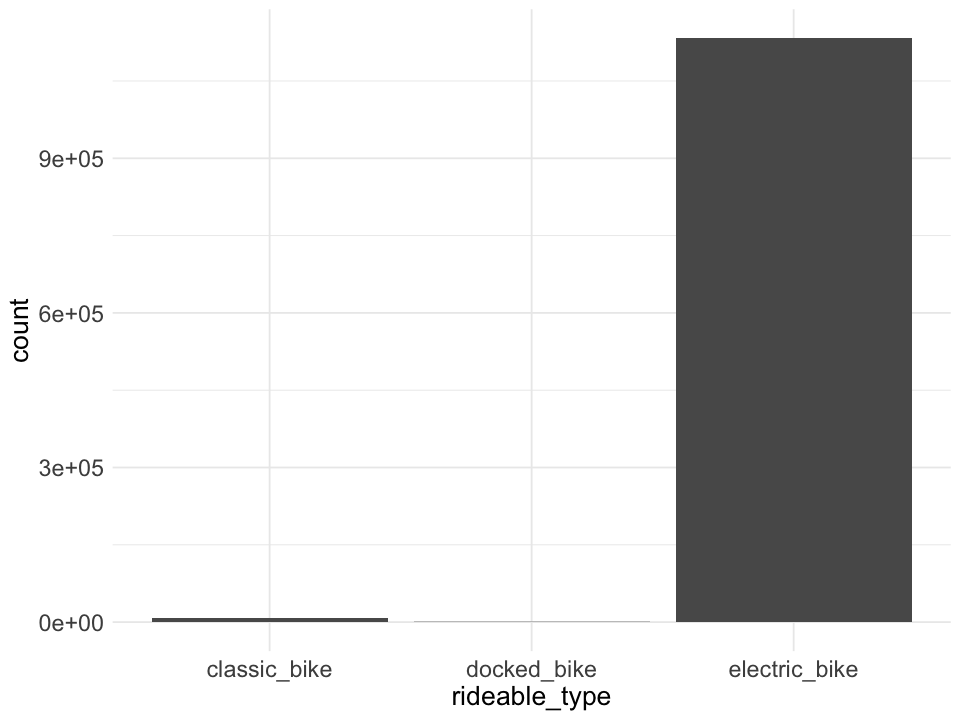

In [286]:
# make plot size smaller
options(repr.plot.width = 8, repr.plot.height = 6)

# bike types of those rows with NAs
data_na <- data_all[rowSums(is.na(data_all)) > 0, ]
data_na %>% 
  ggplot(aes(x = rideable_type)) +
  geom_bar()

Almost all of those missing values are from electric bikes, let's keep those rows to avoid bias. We can deal with them later when analyzing rides by station.

As for the identifier `ride_id`, it has no missing values, but we should also check if it has any duplicates.

#### Find duplicates

In [17]:
# check if all `ride_id` are unique
cat('ride_id is unique:', length(unique(data_all$ride_id)) == dim(data_all)[1])

ride_id is unique: TRUE

All values in `ride_id` are unique. For the rest of columns, it's OK to have duplicates.
In the first 6 rows, `rideable_type` are all "electric_bike" and `member_casual` are all "casual", let's check what other values they have.

#### Unique values of rideable_type and member_casual

In [18]:
unique(data_all[c("rideable_type", "member_casual")])

rideable_type,member_casual
<chr>,<chr>
electric_bike,casual
classic_bike,casual
electric_bike,member
classic_bike,member
docked_bike,casual


There are 2 rider types: casual and member. They have 2 bike types, electric bikes and classic bikes in common. Docked bikes are chosen by casual riders only. Interestly, there is no information about docked bikes in [Divvy Bikes](https://divvybikes.com/how-it-works/meet-the-bikes), I sent an email to Lyft and here was the reply:

> In April 2020 we made some changes to the platform that Divvy runs on. Prior to that date, a classic bike (not electric) is described as a "docked_bike" in the monthly data, after April 2020 the same bikes are tracked as "classic_bike". The bikes are the same, there's no difference between them (other than the date-related change described above).

In short, `docked_bike` is actually `classic_bike`, let's replace them in later section.

Next, let's check the summary statistics.

#### Summary statistics

In [19]:
data_all %>% select_if(is.numeric) %>% summary()

   start_lat       start_lng         end_lat         end_lng      
 Min.   :41.64   Min.   :-87.84   Min.   :41.39   Min.   :-88.97  
 1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88   1st Qu.:-87.66  
 Median :41.90   Median :-87.64   Median :41.90   Median :-87.64  
 Mean   :41.90   Mean   :-87.65   Mean   :41.90   Mean   :-87.65  
 3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93   3rd Qu.:-87.63  
 Max.   :45.64   Max.   :-73.80   Max.   :42.17   Max.   :-87.49  
                                  NA's   :4766    NA's   :4766    

The max values of `start_lat` and `start_lng` are very different from the average values. According to [Wikipedia: Location map/data/United States Chicago Greater](https://en.wikipedia.org/wiki/Module:Location_map/data/United_States_Chicago_Greater), Chicago's latitude ranges from 42.163 to 41.553, its longitude ranges from -88.11 to -87.252. So at least some coordinates with max values are outside of Chicago, we will need to remove those outliers later.

<a id="process"></a>
## <span style="color:#0071bc">4. Process</span>

<a id="cleaning"></a>
### 4.1 Data cleaning and formatting

#### Remove duplicates
In the previous section, we have proven that all `ride_id` are unique, so no duplicate data needs to be removed.

#### Remove white spaces

Remove strings with excess, trailing and leading white space.

In [256]:
data_clean <- data_all  %>% 
  mutate(across(where(is.character), str_squish))

#### Remove outliers

We've known some coordinates are outside of Chicago, let's remove the outliers.

In [257]:
# get latitude between 41.9653 and 41.8096, longitude between -87.7738 and -87.5658
data_clean <- data_clean %>% 
  filter(
    between(start_lat, 41.553, 42.163) &
    between(end_lat, 41.553, 42.163) &
    between(start_lng, -88.11, -87.252) &
    between(end_lng, -88.11, -87.252) 
  )

#### Replace inaccurate values

Replace "docked_bike" with "classic_bike" as they are the same.

In [258]:
data_clean["rideable_type"][data_clean["rideable_type"] == "docked_bike"] <- "classic_bike"

<a id="manipulation"></a>
### 4.2 Data manipulation

#### Get year, month, day of the week and hour
Also, let's split the datetime columns to year, month, day of the week and hour for later analysis.

In [261]:
# convert start/end date
data_clean <- data_clean  %>% 
  mutate(
    year = year(started_at),
    month = month(started_at, label = TRUE, abbr = FALSE),
    day_of_week = weekdays(started_at),
    start_hour = hour(started_at),
    end_hour = hour(ended_at)
  )

#### Get ride duration

Calculate the ride duration in minutes.

In [262]:
# calculate the ride duration, remove unneeded column started_at and ended_at
data_clean <- data_clean  %>% 
  mutate(
    ride_duration_mins = round(as.numeric(ended_at - started_at, units="mins"), 2)
  )%>% 
  select(-c("started_at", "ended_at"))

We've created 6 new columns, let's check their statistics.

In [263]:
# summary of the 6 new columns
data_clean %>% select(year:ride_duration_mins) %>% summary()

      year            month         day_of_week          start_hour  
 Min.   :2021   July     : 821679   Length:5752780     Min.   : 0.0  
 1st Qu.:2021   August   : 803646   Class :character   1st Qu.:11.0  
 Median :2021   September: 755551   Mode  :character   Median :15.0  
 Mean   :2021   June     : 728877                      Mean   :14.2  
 3rd Qu.:2021   October  : 630742                      3rd Qu.:18.0  
 Max.   :2022   May      : 531181                      Max.   :23.0  
                (Other)  :1481104                                    
    end_hour     ride_duration_mins
 Min.   : 0.00   Min.   :  -58.03  
 1st Qu.:11.00   1st Qu.:    6.45  
 Median :15.00   Median :   11.50  
 Mean   :14.35   Mean   :   20.01  
 3rd Qu.:18.00   3rd Qu.:   20.92  
 Max.   :23.00   Max.   :55944.15  
                                   

It's strange that `ride_duration_mins` has negative values, it means `ended_at` is earlier than `started_at`.
It might because of some unknown bugs, we need to know how many rows are affected.

In [264]:
# get the dimensions
negative_duration_rides <- data_clean %>% filter(ride_duration_mins < 0)
dim(negative_duration_rides)

[1] 140  17

There are only 140 rows that have negative `ride_duration_mins`, it's OK to delete them.

In [265]:
# delete the data whose `ride_duration_mins` is negative
data_clean <- data_clean %>% 
  filter(ride_duration_mins > 0)

#### Factor

By default, characters of `day_of_week` will be sorted in alphabetical order, we need to sort it in chronological order.

In [287]:
data_clean <- data_clean %>% 
  mutate(
    day_of_week = factor(day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))  
  )

Finally, let's double check the updated data.

In [267]:
head(data_clean)

ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,day_of_week,start_hour,end_hour,ride_duration_mins
<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<fct>,<int>,<int>,<dbl>
C809ED75D6160B2A,electric_bike,NA,NA,NA,NA,41.90,-87.63,41.89,-87.61,casual,2021,May,Sunday,11,12,12.40
DD59FDCE0ACACAF3,electric_bike,NA,NA,NA,NA,41.88,-87.62,41.79,-87.58,casual,2021,May,Sunday,11,12,44.92
0AB83CB88C43EFC2,electric_bike,NA,NA,NA,NA,41.92,-87.70,41.92,-87.70,casual,2021,May,Sunday,14,14,1.20
7881AC6D39110C60,electric_bike,NA,NA,NA,NA,41.92,-87.70,41.94,-87.69,casual,2021,May,Sunday,14,14,15.22
853FA701B4582BAF,electric_bike,NA,NA,NA,NA,41.94,-87.69,41.94,-87.70,casual,2021,May,Sunday,18,18,6.88
F5E63DFD96B2A737,electric_bike,NA,NA,NA,NA,41.88,-87.63,41.89,-87.62,casual,2021,May,Sunday,11,11,23.60


<a id="analyze"></a>
## <span style="color:#0071bc">5. Analyze and Share</span>

<a id="share_rider_type"></a>
### 5.1 Share of ride by rider type

Our ultimate goal is to increase members, first of all, we need to know the share of rides that belongs to members.

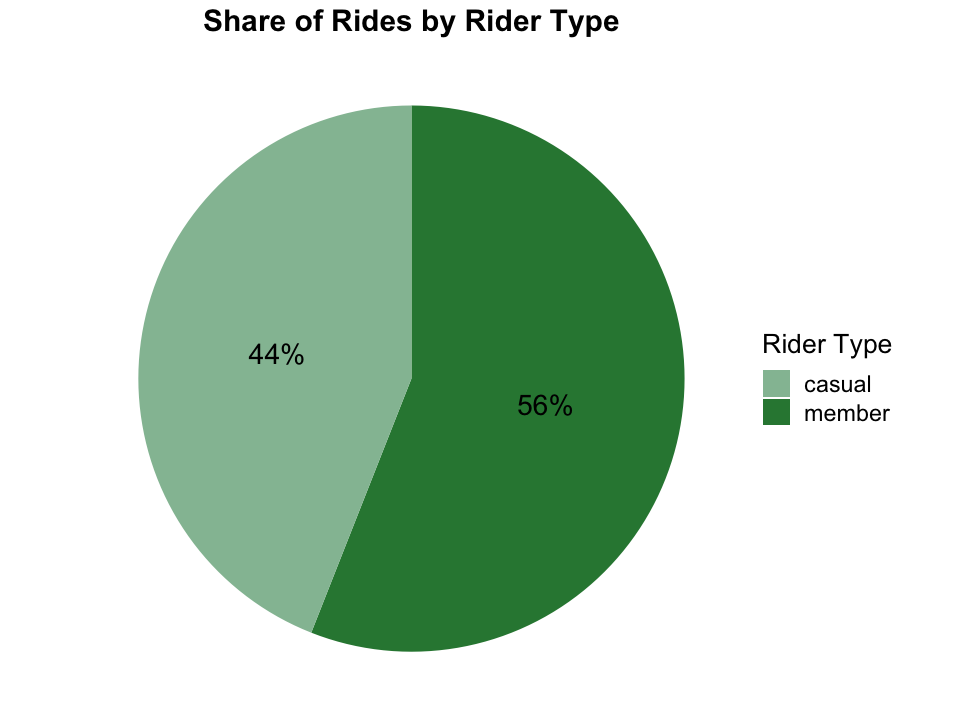

In [268]:
options(repr.plot.width = 8, repr.plot.height = 6)

# get percentage of each rider type
member_type_grouped <- data_clean %>% 
  group_by(member_casual) %>% 
  count() %>% 
  ungroup() %>% 
  mutate(
    per = `n` / sum(`n`),
    label = percent(per)    
  ) %>% 
  arrange(desc(member_casual))

# create a pie chart to display each rider type's share
rider_diff_colors <- c("#94bfa2", "#2e8540")
member_type_grouped %>% 
  ggplot() +
  geom_bar(aes(x = "", y = per, fill = member_casual), stat = "identity") +
  coord_polar("y", start = 0) + 
  scale_fill_manual(name = "Rider Type", values = rider_diff_colors) +
  geom_text(aes(x = 1, y = cumsum(per) - per/2, label = label), size = 6) +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  ) +
  labs(
    title = "Share of Rides by Rider Type"
  )

In the previous 12 months, 56% of rides were from members, more than casual riders' 44%.

To maximize the number of members, we need to find their preferences. Next, let's explore which bike types are more popular.

<a id="popular"></a>
### 5.2 Popular bike type

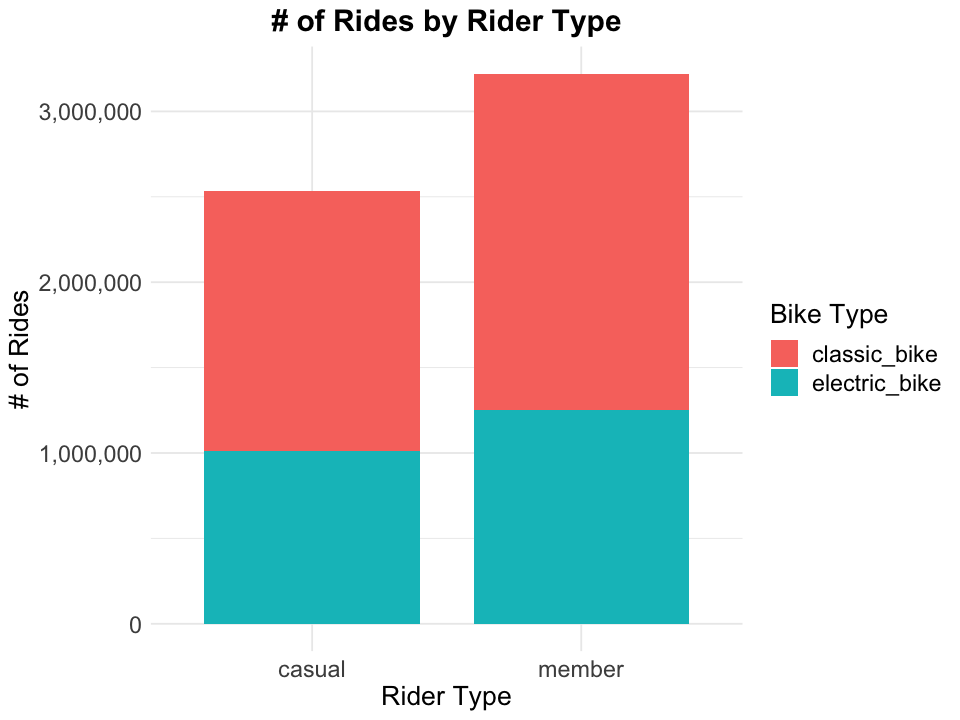

In [276]:
data_clean %>% 
  ggplot(aes(x = member_casual, fill = rideable_type)) +
  geom_bar(width = 0.8) +
  scale_y_continuous(labels = label_comma()) +
  labs(
    title = "# of Rides by Rider Type",
    fill = "Bike Type",
    x = "Rider Type",
    y = "# of Rides"
  )

According to above bar plot, classic bikes are more popular among both casual riders and members.

Besides the number of rides, ride duration is another indicator of popularity, given people will change another bike if they find a bike is not their type.

<a id="duration"></a>
### 5.3 Ride duration

In the previous section, we've deleted some data whose ride duration is negative. Let's check its summary statistics again, grouped by bike type and rider type.

In [277]:
# grouped by rider type and bike type and get its summary statistics
member_bike_grouped <- data_clean %>% 
  group_by(member_casual, rideable_type) %>% 
  summarise_at(vars(ride_duration_mins),
               list(min = min, p5 = ~quantile(., probs = 0.05), p25 = ~quantile(., probs = 0.25),
                    median = median, p75 = ~quantile(., probs = 0.75),
                    p95 = ~quantile(., probs = 0.95), max = max))

member_bike_grouped

member_casual,rideable_type,min,p5,p25,median,p75,p95,max
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,classic_bike,0.02,4.35,10.07,17.68,32.30,94.170,55944.15
casual,electric_bike,0.02,3.02,7.40,12.87,22.92,57.038,487.27
member,classic_bike,0.02,2.52,5.62,9.65,16.57,34.330,1499.93
member,electric_bike,0.02,2.08,4.92,8.48,14.87,32.330,480.52


All min values are close to 0 and max values are well above the 95th percentile, which means there are many outliers. To get a better visualization of the distribution of `ride_duration_mins`, let's ignore those outliers.

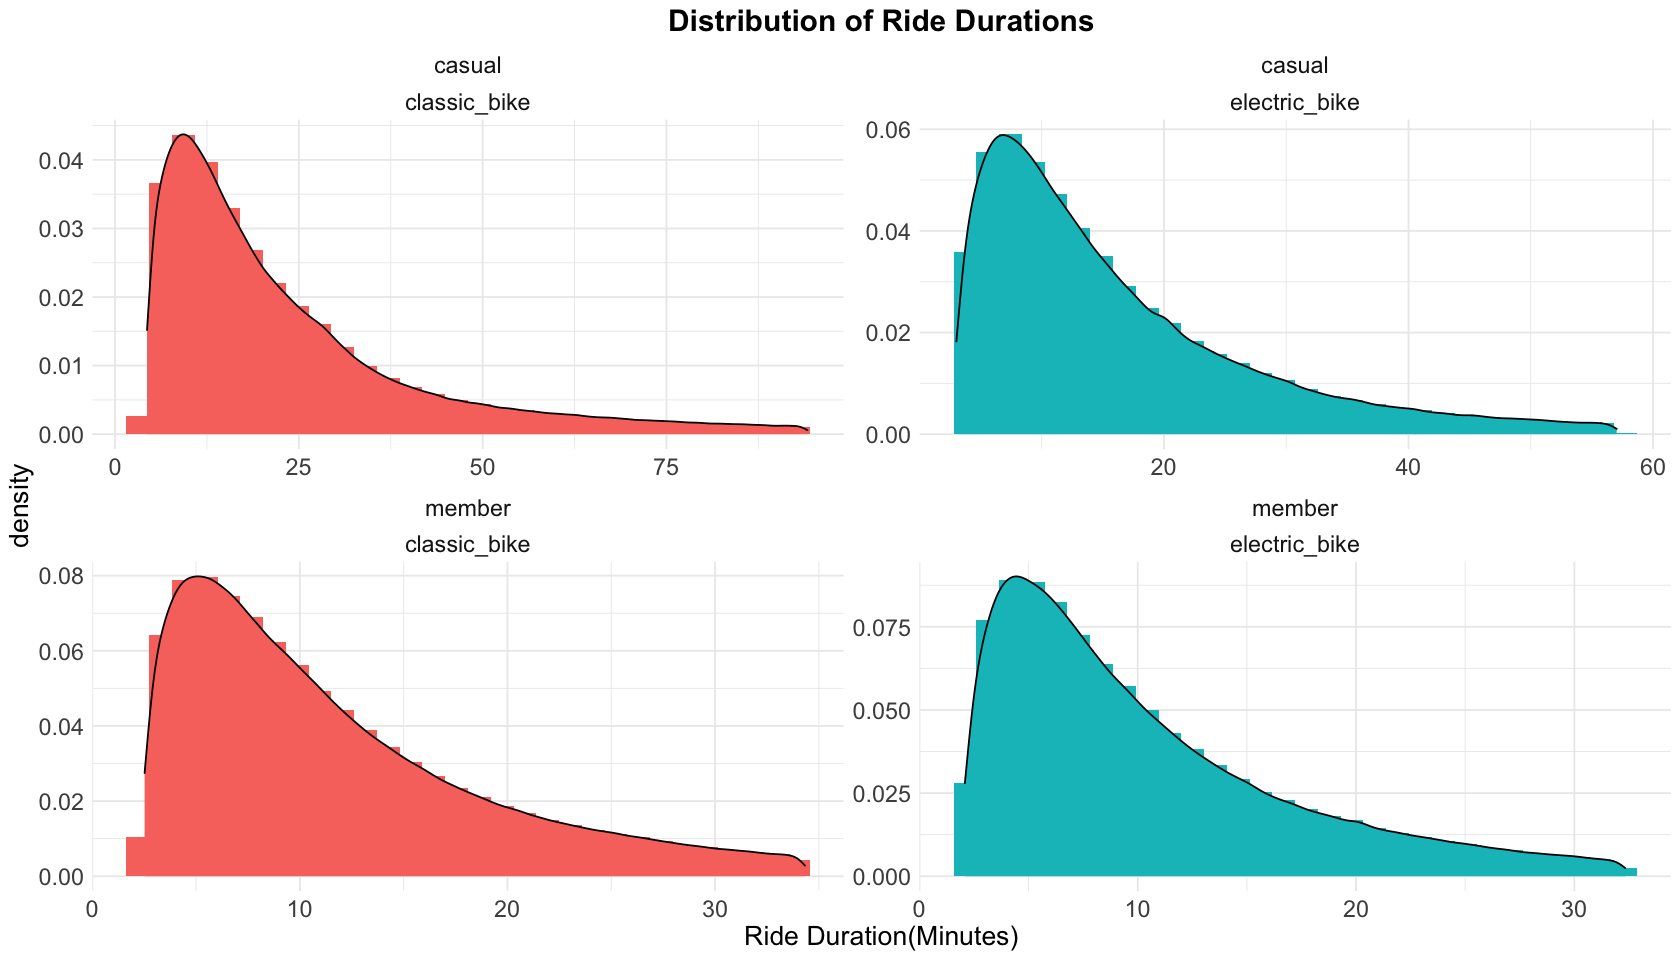

In [288]:
options(repr.plot.width = 14, repr.plot.height = 8)

data_clean %>%
  group_by(member_casual, rideable_type) %>% 
  filter(ride_duration_mins >= quantile(ride_duration_mins, probs = 0.05) & 
         ride_duration_mins <= quantile(ride_duration_mins, probs = 0.95)) %>% 
  ungroup() %>% 
  ggplot(aes(x = ride_duration_mins, fill = rideable_type)) +
  geom_histogram(aes(y = ..density..), bins = 30) +
  geom_density() +
  facet_wrap(
    ~ member_casual + rideable_type,
    scales = "free"
  ) +
  theme(legend.position = "none") + 
  labs(
    title = "Distribution of Ride Durations",
    x = "Ride Duration(Minutes)"
  )

What we can learn from the statistics and density plot of ride durations:

- Casual riders ride significantly longer than members, by both classic bikes and electric bikes. And casual riders ride classic bikes longer than electric bikes.

- Members' ride duration of classic bikes and electric bikes are very close.

<a id="price"></a>
### 5.4 Price strategy

#### Current price plans
We've known the rides data are from Divvy, we can also find it price plans, [Singe Ride Price](https://divvybikes.com/pricing/single-ride), [Day Pass Price](https://divvybikes.com/pricing/day-pass) and [Annual Memberships](#https://divvybikes.com/pricing/annual). Here is the summary:

- **Single Ride Price**
    - classic bikes: \\$1 to unlock plus \\$0.16/minute.
    - electric bikes: \\$1 to unlock plus \\$0.39/minute.

- **Day Pass Price**: 
    - classic bikes: \\$15, includes unlimited rides in a 24-hour period, up to 3 hours each.
    - electric bikes: \\$1 to unlock plus \\$0.39/minute.
    
- **Annual Memberships**:
    - \\$119 Billed upfront annually
    - classic bikes: free first 45 minutes of each ride, then an extra \\$0.16/min for longer than 45 minutes.
    - electric bikes: \\$0 to unlock plus \\$0.16/minute.

#### Is the membership fee reasonable?
For the time duration, we've known that among rides from members by classic bikes, 95% of them are shorter than 35 minutes. Therefore the free 45 minutes is long enough for the daily needs of members.

What about the membership fee? Aassuming there is a user spends 9.6 minutes (the median time of members who ride classic bikes) to work, choosing classic bikes and single ride price plan each time. As long as the user rides more than 47 times, the total expense will be higher than \\$119. That is, for local residents like that user, as long as they need to commute to work more than 24 days, annual membership is the most economic plan ($24*2*((1 + 9.6 * 0.16)= 122)$).

However, \\$119 a year is still expensive compared to using users' own bikes, especially there are plenty of under \\$200 bikes available online.

Now assuming that user rides electric bikes, the median time of members who ride electric bikes is 8.5 minutes. As long as the user need to commute to work more than 21 days, selecting annual membership plan is the most economic ($(1+8.5*0.39)*21*2 > 119+0.16*8.5*21*2$). Moreover, purchasing an ebike is much more expensive (it's common to be higher than \\$1000) and the user need to make sure it's charged correctly and in a timely manner.

In short, even though currently classic bikes are more popular, members who ride electric bikes benefit more from the annual membership plan.


#### Suggestion

- Appropriately reduce the membership fee to attract more local residents. To make up for the loss, appropriately increase the price of electric bikes per minute for members.

<a id="rides_month"></a>
### 5.5 Rides by month

The data is for the period 2021/05 - 2022/04, which is exactly 12 months, let's check if rides differ by month.

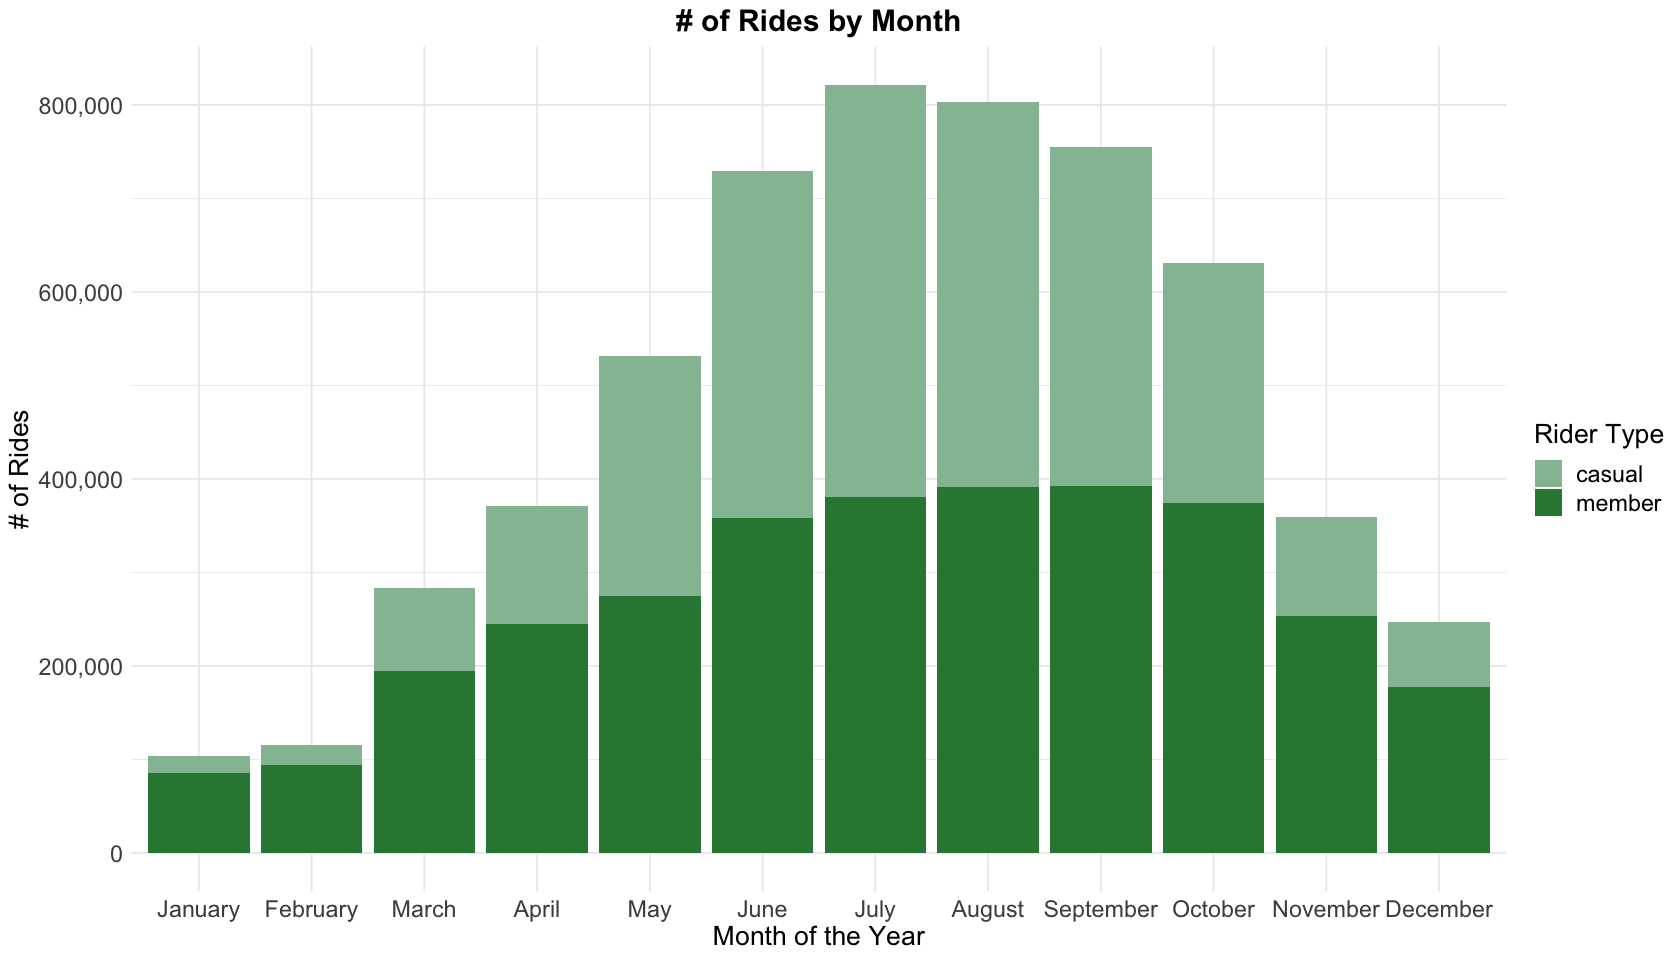

In [279]:
data_clean %>% 
  ggplot(aes(x = month, fill = member_casual)) +
  geom_bar() +
  scale_fill_manual(name = "Rider Type", values = rider_diff_colors) +
  scale_y_continuous(labels = label_comma()) +
  labs(
    title = "# of Rides by Month",
    x = "Month of the Year",
    y = "# of Rides"
  )

What we can learn from the bar chart above:

- July and August have the most rides, and casual riders and members have a near equal number of rides.
- January and February have the least rides, and the majority of rides are from members. 

Overall, there are fewer rides in colder months, the trend of the number of rides matches the curve of [Average Monthly Temperature of Chicago](https://weather-and-climate.com/average-monthly-min-max-Temperature,Chicago,United-States-of-America), see the image below:
<img src="https://weather-and-climate.com/uploads/average-temperature-united-states-of-america-chicago.png" />

That makes sense since bike riding is an outdoor activity that influenced by temparature and weather greatly, and given casual riders are probably visitors, they are influenced by temparature more than members. 

Riding in the winter may not be very enjoyable for some people, but it's less expensive than driving and more flexiable than public transporation. But for other local residents who is unwilling to ride in winter, joining the membership is not worthwhile.

In summary, here are the suggestions:

- In June-September, prepare more bikes, or at least do inspection more frequently to make sure bikes are ready for use.

- Add seasonal price plans for winter and non-winter seasons.

- Reward members who ride frequently in winter. For example, offering gifts like gloves, scarves that can keep warm.

<a id="rides_dow"></a>
### 5.6 Rides by day of the week

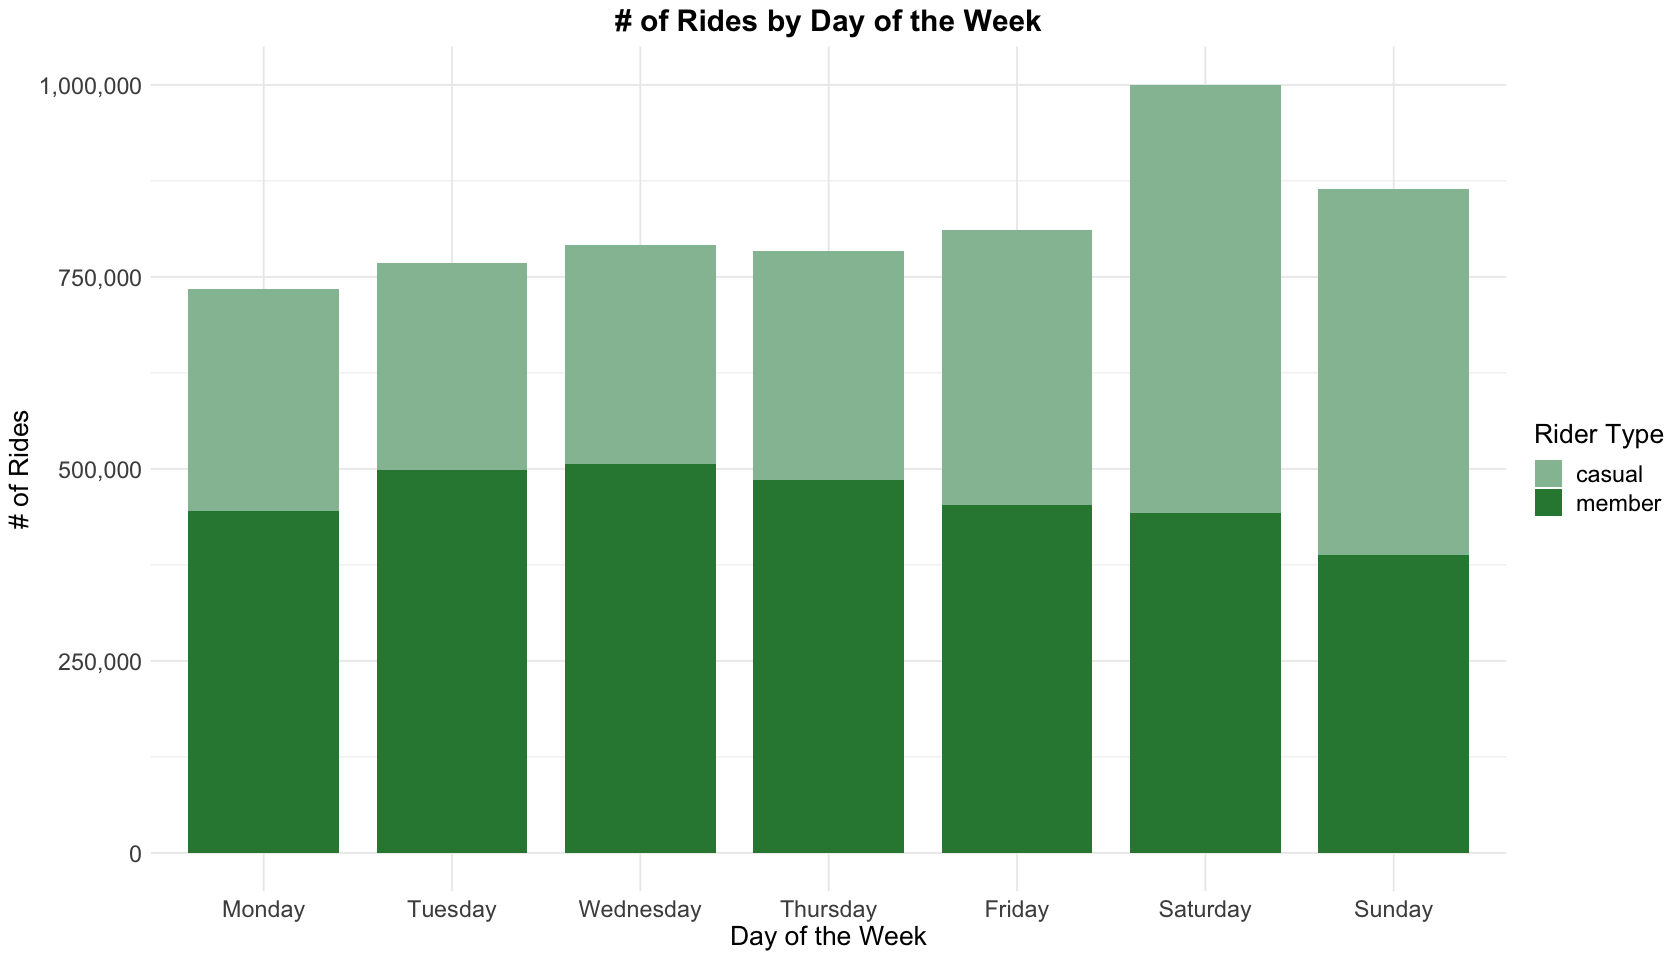

In [280]:
data_clean %>% 
  ggplot(aes(x = day_of_week, fill = member_casual)) +
  geom_bar(width=0.8) +
  scale_fill_manual(name = "Rider Type", values = rider_diff_colors) +
  scale_y_continuous(labels = label_comma()) +
  labs(
    title = "# of Rides by Day of the Week",
    x = "Day of the Week",
    y = "# of Rides"
  )

Casual riders like weekend riding, while members ride more on weekdays, especially from Tuesday to Thursday.
That also implys casual riders are probably tourists, or local residents who ride on weekends for fun. While members are probably local residents who ride to work.

In summary, here are the suggestions:

- On weekends, prepare more bikes or at least inspect those bikes more frequently.
- Reward members who ride less frequently on weekends.

<a id="rides_hour"></a>
### 5.7 Rides by hour of the day

There are 2 time related variables, `start_hour` and `end_hour`. Here we will focus on `start_hour`, because from previous section we've known the ride durations are short, most cases `end_hour` is very close to `start_hour`. Moreover, the time to start riding reveals rider's habits and preferences. 

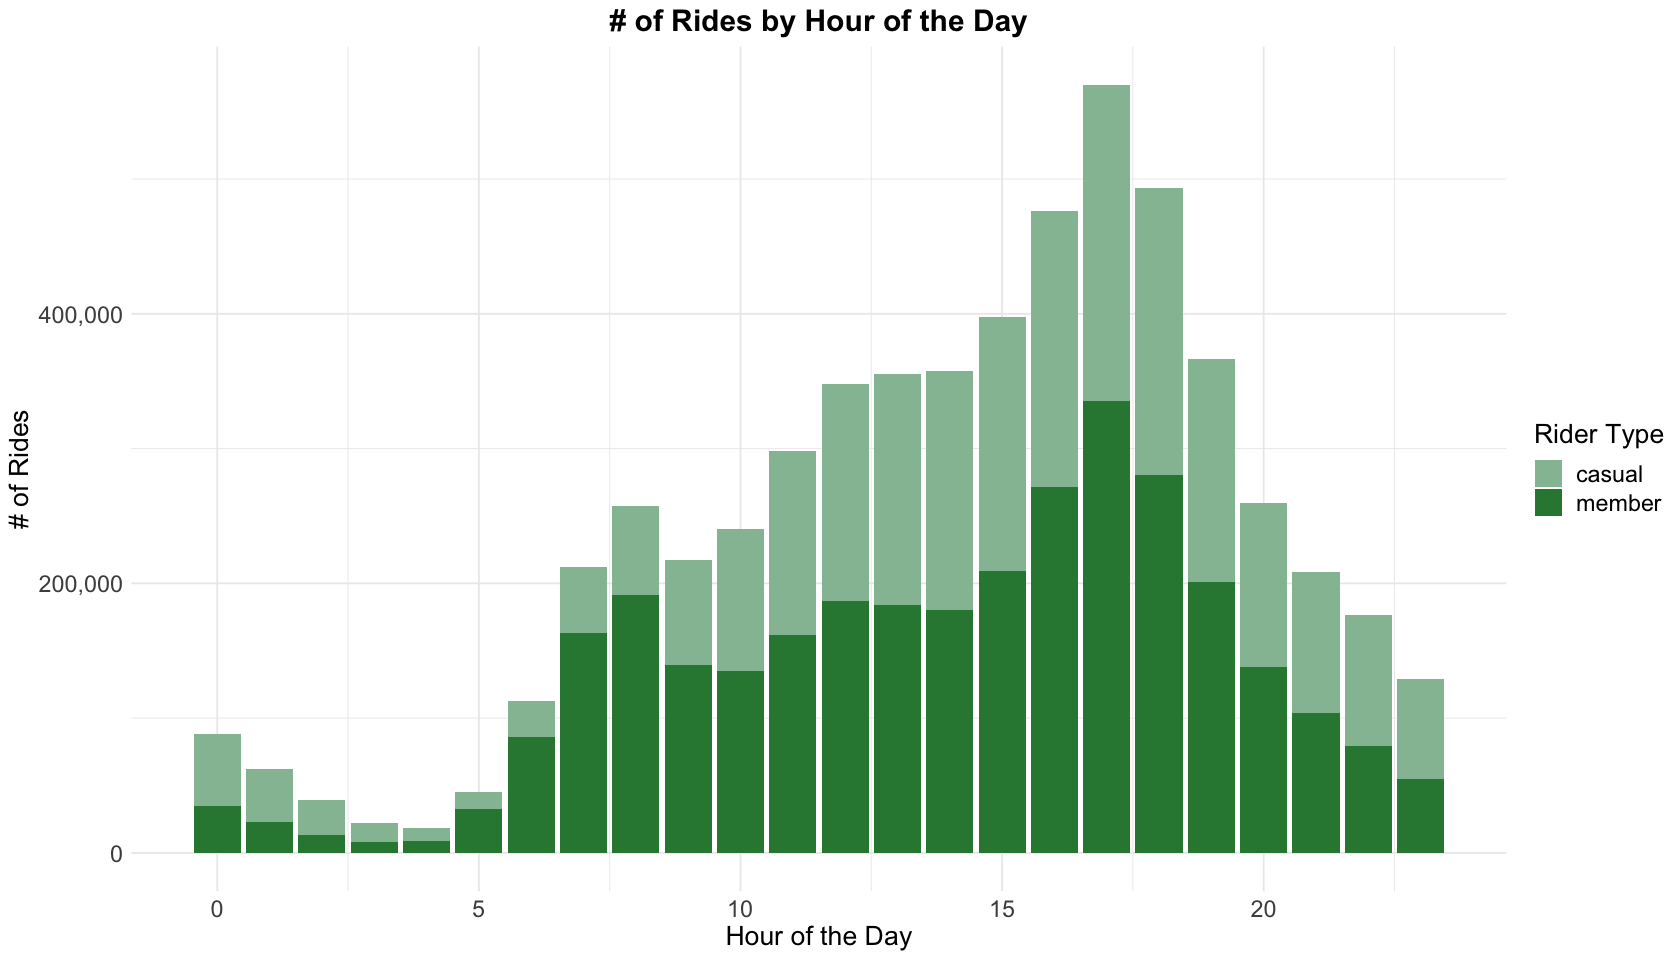

In [281]:
data_clean %>% 
  ggplot(aes(x = start_hour, fill = member_casual)) +
  geom_bar() +
  scale_fill_manual(name = "Rider Type", values = c("#94bfa2", "#2e8540")) +
  scale_y_continuous(labels = label_comma()) +
  labs(
    title = "# of Rides by Hour of the Day",
    x = "Hour of the Day",
    y = "# of Rides"
  )

What we can learn from the chart above:

- Overall, rides peak at 8 AM and 5 PM, most from members. 4-6 PM has the most rides, and it is also the busiest period for members.
- Casual riders ride most on 11 AM - 7 PM and relatively evenly by hour.
- 0-5 AM has the least rides.

Given 8 AM/5 PM is the time to for local residents to go to/take off work, does it mean the ride of the same time will be less on weekends? Let's check it by a heatmap.

<a id="rides_heatmap"></a>
### 5.8 Rides Heatmap

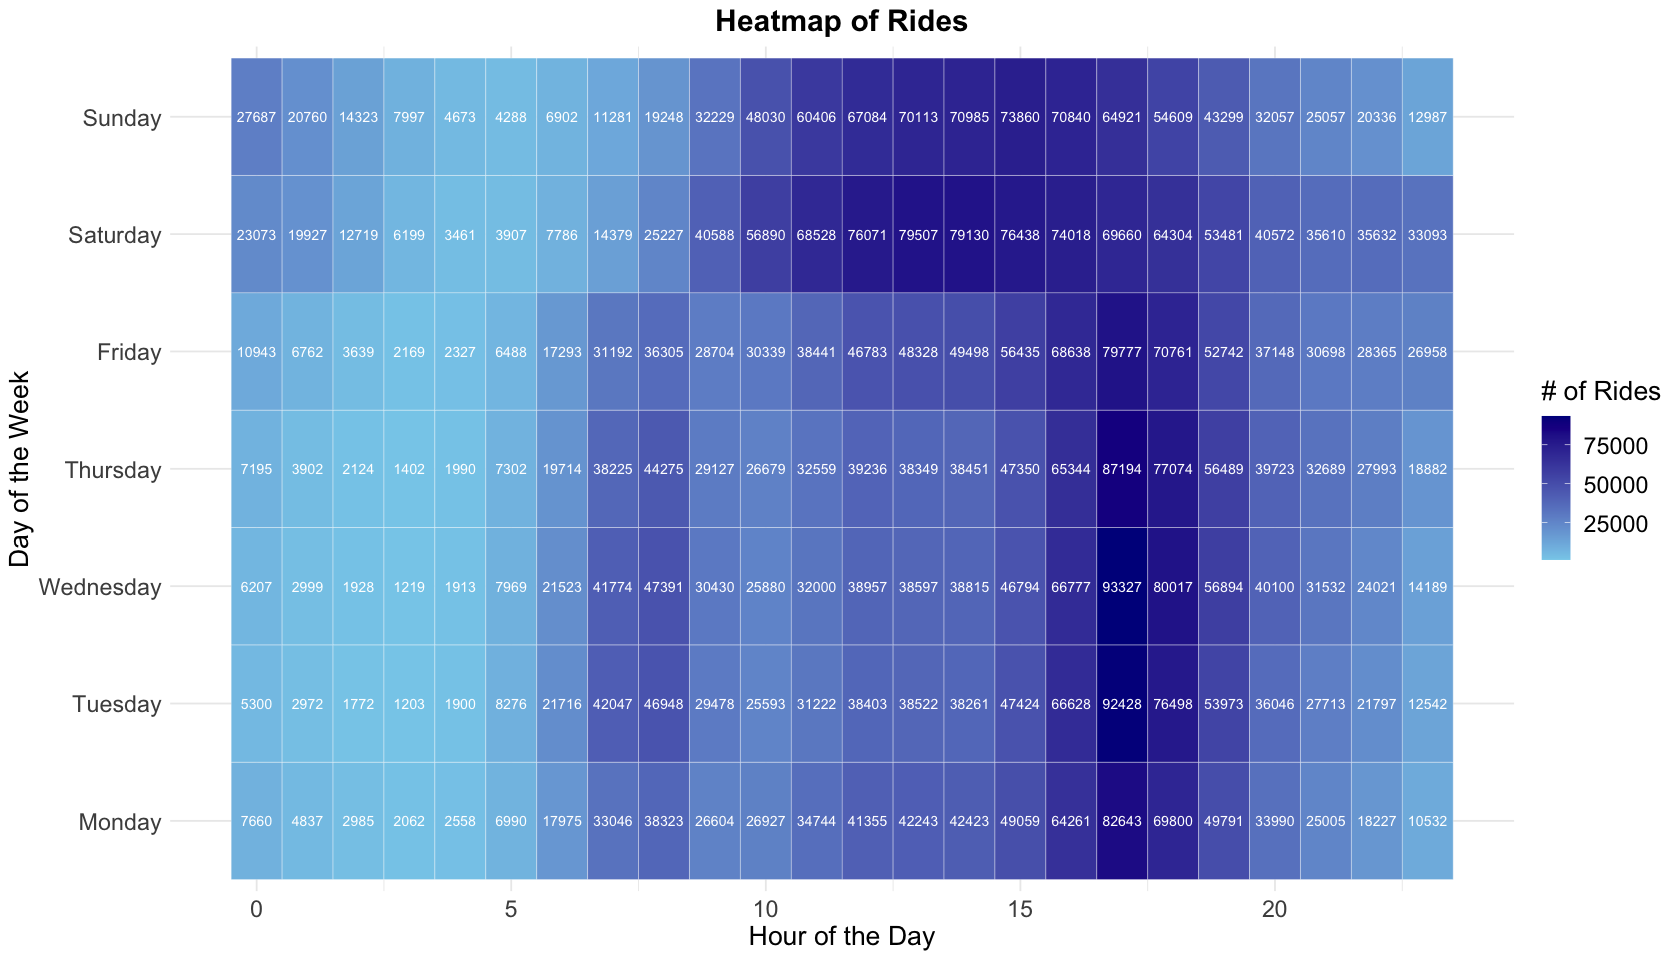

In [282]:
# grouped by `day_of_week` and `start_hour`
day_hour_grouped <- data_clean %>% 
  group_by(day_of_week, start_hour) %>% 
  count() %>%
  ungroup()

day_hour_grouped  %>% 
  ggplot(aes(x = start_hour, y = day_of_week, fill = n)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "skyblue", high = "darkblue") +
  geom_text(aes(label = n), color = "white", size = 3) +
  guides(fill = guide_colourbar(title = "# of Rides")) +
  labs(
    title = "Heatmap of Rides",
    x = "Hour of the Day",
    y = "Day of the Week"
  )

From the previous bar plot we've known 4-6 PM has the most rides, and the heatmap indicates weekends differ from weekdays. On weekends, most riders ride bikes during 12-4 PM.

If Cyclistic need to do inspection/maintenance/replacement, the best time is 0-5 AM on weekdays or 3-6 AM on weekends, which are low peak times for riding.


<a id="rides_station"></a>
### 5.9 Rides by station
By analyzing the rides volume of each station, we might find some interesting patterns of the two groups.

Let's start from start stations.

In [283]:
# filter out data whose geodata of stations are missing
stations_data <- data_clean %>%
  drop_na(start_lat:end_lng) %>% 
  select(rideable_type:member_casual)

# grouped by start_station_name and its latitude & longitude
start_station_grouped <- stations_data %>%
  group_by(start_station_name, start_lat, start_lng) %>%
  count() %>% 
  ungroup() %>% 
  arrange(desc(n))

start_station_grouped

start_station_name,start_lat,start_lng,n
<chr>,<dbl>,<dbl>,<int>
Streeter Dr & Grand Ave,41.89228,-87.61204,69767
NA,41.79000,-87.60000,48700
Wells St & Concord Ln,41.91213,-87.63466,30945
Theater on the Lake,41.92628,-87.63083,30213
Clark St & Elm St,41.90297,-87.63128,29293
Michigan Ave & Oak St,41.90096,-87.62378,27690
Wells St & Elm St,41.90322,-87.63432,26584
NA,41.80000,-87.59000,26276
Clark St & Lincoln Ave,41.91569,-87.63460,24692


Stations like "Yates Blvd & 93rd St" have many longitudes that differ in 4th or 5th decimal place. According to [Wikipedia: Decimal Degrees](https://en.wikipedia.org/wiki/Decimal_degrees), the actual length difference is small, we can calculate the average latitude & longitude of each station as its fixed coordinates.

Next, let's get the average latitude & longitude of both start and end stations, and re-group them.

#### Maps: start vs. end stations

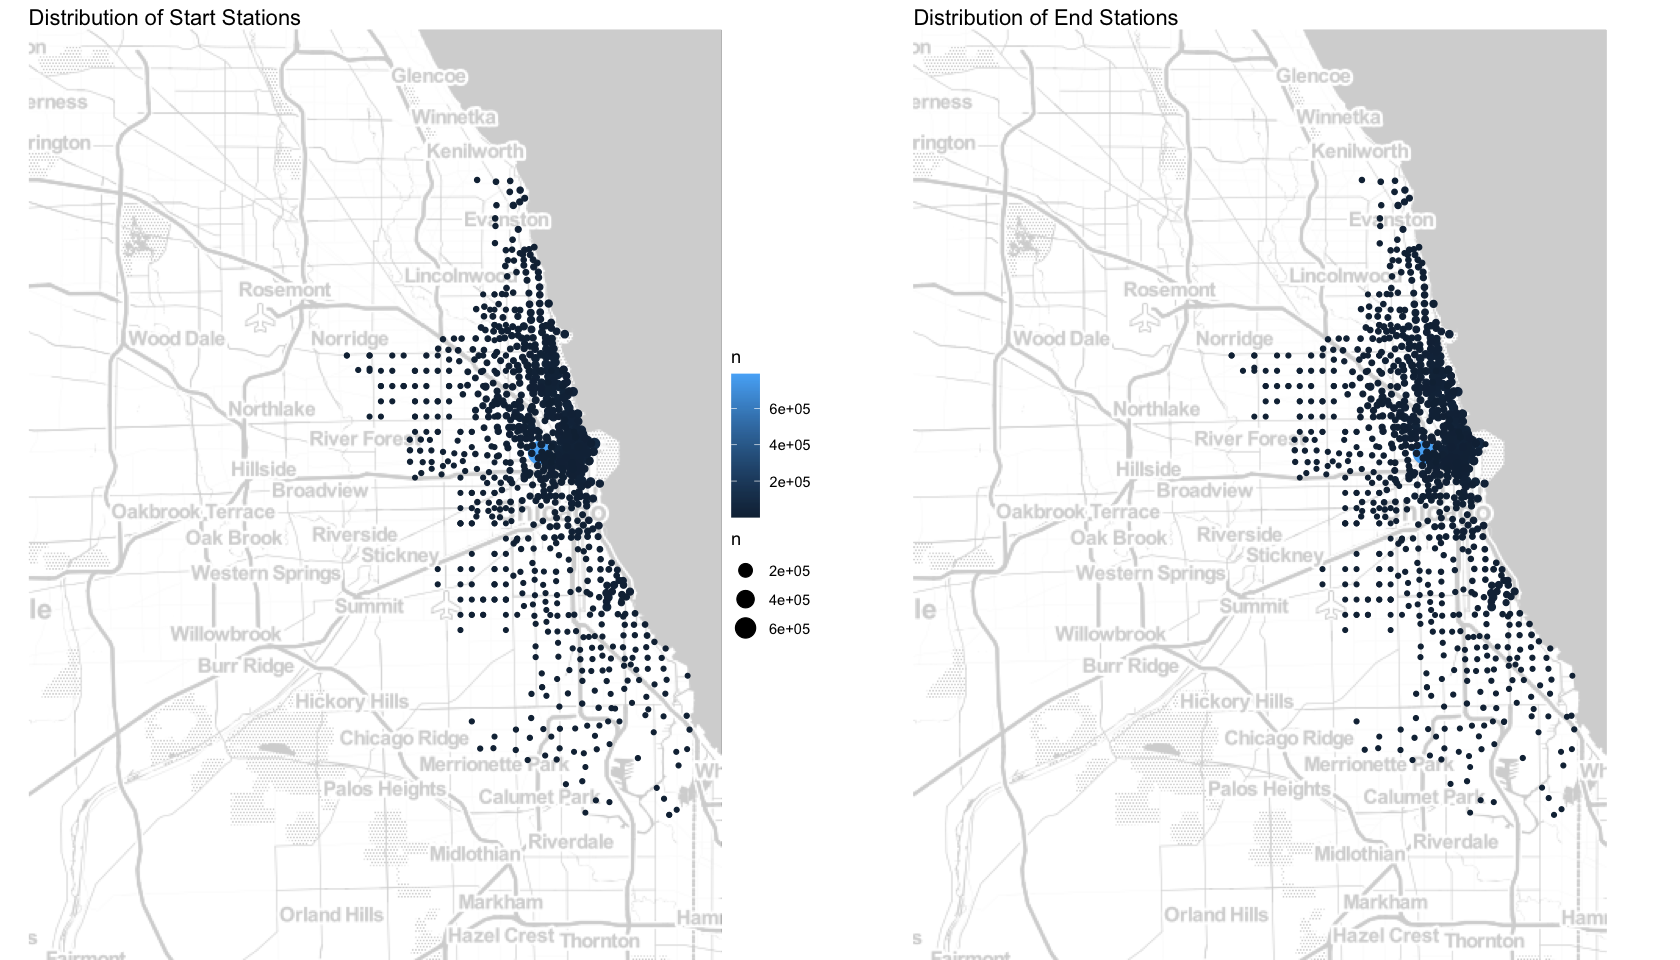

In [284]:
# get average lat & lng of start stations
stations_data <- stations_data %>% 
  group_by(start_station_id) %>% 
  mutate(
    start_lat = round(mean(start_lat), 5),
    start_lng = round(mean(start_lng), 5)
  ) %>% 
  ungroup()

# start stations
start_station_grouped <- stations_data %>%
  group_by(start_station_name, start_lat, start_lng) %>%
  count() %>% 
  ungroup() %>% 
  arrange(desc(n))

# get average lat & lng of end stations
stations_data <- stations_data %>% 
  group_by(end_station_id) %>% 
  mutate(
    end_lat = round(mean(end_lat), 5),
    end_lng = round(mean(end_lng), 5)
  ) %>% 
  ungroup()

# end stations
end_station_grouped <- stations_data %>%
  group_by(end_station_name, end_lat, end_lng) %>%
  count() %>% 
  ungroup() %>% 
  arrange(desc(n))

options(repr.plot.width = 14, repr.plot.height = 8)
# get the stamen map of Chicago
chi_bb <- c(
  left = -88.11,
  bottom = 41.553,
  right = -87.5,
  top = 42.163
)
chicago_stamen <- get_stamenmap(
  bbox = chi_bb,
  zoom = 10,
  maptype = "toner"
)

p1 <- ggmap(chicago_stamen, darken = c(0.8, "white")) +
  geom_point(data = start_station_grouped, aes(x = start_lng, y = start_lat, color = n, size = n)) +    
  theme_void() +
  labs(title = "Distribution of Start Stations")

p2 <- ggmap(chicago_stamen, darken = c(0.8, "white")) +
  geom_point(data = end_station_grouped, aes(x = end_lng, y = end_lat, color = n, size = n)) +    
  theme_void() +
  theme(legend.position = "none") +
  labs(title = "Distribution of End Stations")

grid.arrange(p1, p2, ncol = 2)

There is no obvious difference between the distribution of start stations and end stations, which is normal. Stations are concentrated in the central and northern of Chicago, and the closer to the sea the busier the station. Next, let's visualize the difference between casual riders and members.

#### Maps of top 100 routes: casual riders vs. members

We've known that casual riders are mainly visitors and members are local residents, is there any difference in their riding routes? Here we use the coordinates of start and end stations as the proxy of routes, let's create maps of the top 100 most popular routes to show their preferences.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Warning message:
“Removed 1 rows containing missing values (geom_curve).”


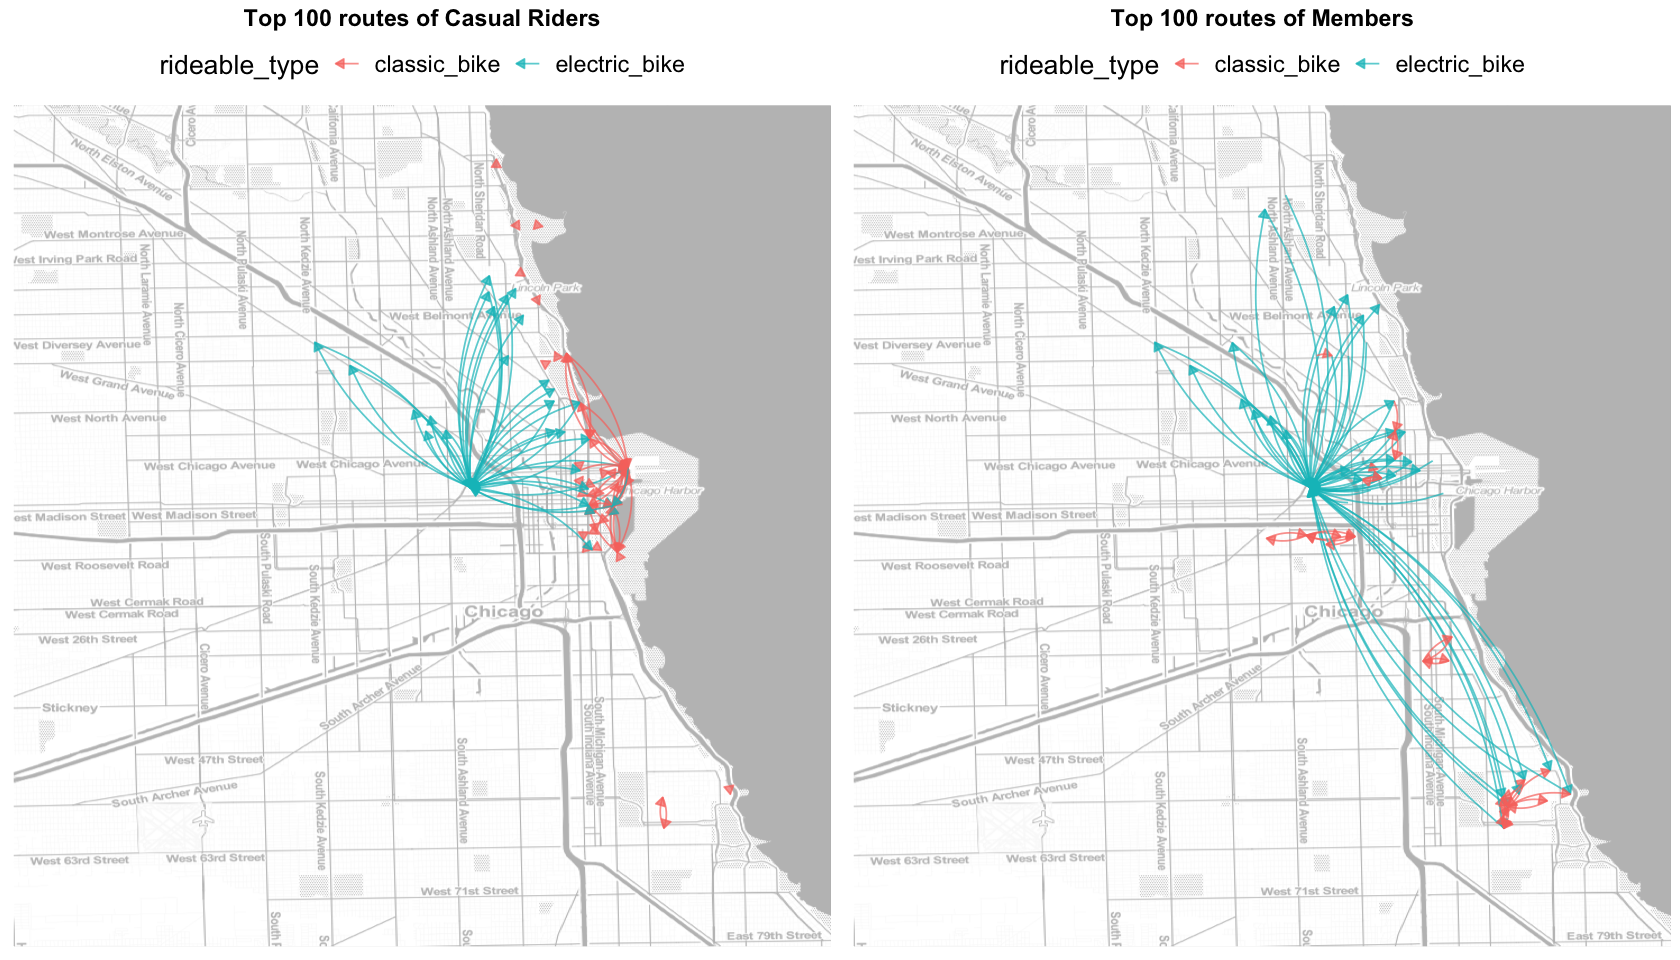

In [285]:
# get start and end coordinates
ride_coordinates <- stations_data %>% 
  filter(start_lng != end_lng & start_lat != end_lat) %>%
  group_by(start_lng, start_lat, end_lng, end_lat, member_casual, rideable_type) %>%
  summarise(total = n(),.groups = "drop") %>%
  arrange(desc(total))

# get top 100 most popular routes of each rider type
casual_coordinates <- ride_coordinates %>% 
  filter(member_casual == "casual") %>% 
  head(100)
member_coordinates <- ride_coordinates %>% 
  filter(member_casual == "member") %>% 
  head(100)

# narrow the border coordinates as stations are concentrated in the central and northern 
chi_bb <- c(
  left = -87.80,
  bottom = 41.75,
  right = -87.55,
  top = 42.00
)

chicago_stamen <- get_stamenmap(
  bbox = chi_bb,
  zoom = 12,
  maptype = "toner"
)

# casual riders
p1 <- ggmap(chicago_stamen, darken = c(0.7, "white")) +
  geom_curve(casual_coordinates, 
             mapping = aes(x = start_lng, y = start_lat, 
                           xend = end_lng, yend = end_lat, 
                           color = rideable_type), 
             curvature = 0.2, alpha = 0.7,
             arrow = arrow(length = unit(0.2,"cm"), ends = "first", type = "closed")) +
  coord_cartesian(default = TRUE) +  
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        legend.position = "top", 
        plot.title = element_text(size=14)
  ) +
  labs(title = "Top 100 routes of Casual Riders")

# members
p2 <- ggmap(chicago_stamen, darken = c(0.7, "white")) +
  geom_curve(member_coordinates, 
             mapping = aes(x = start_lng, y = start_lat, 
                           xend = end_lng, yend = end_lat, 
                           color = rideable_type), 
             curvature = 0.2, alpha = 0.7,
             arrow = arrow(length = unit(0.2,"cm"), ends ="first", type = "closed")) +
  coord_cartesian(default = TRUE) + 
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        legend.position = "top", 
        plot.title = element_text(size=14)
  ) +
  labs(title = "Top 100 routes of Members")

grid.arrange(p1, p2, ncol = 2)

What we can learn from the maps above:

- Casual rides are concentrated in downtown Chicago and attractions.
- Most members rides concentrated in downtown too, while others ride from downtown to South Chicago. Members rarely ride near attractions.
- The distance between the start and end stations of electric bikes are farther, which probably because people prefer to ride an ebike when the distance is long and a classic bike when the distance is short. This preference is more obvious among members.

Besides, in <a href="#duration">5.3 Ride duration</a> we've known casual riders take longer when riding electric bikes than members, which means they prefer a slow and relaxed ride, while members ride faster.

<a id="act"></a>
## <span style="color:#0071bc">6. Act and Recommendations</span>

#### Price Plan

- Appropriately reduce the membership fee to attract more local residents. To make up for the loss, appropriately increase the price of electric bikes per minute for members.
- Add winter and non-winter price plans for members.


#### Improve Customer Satisfaction

- Reward members who ride less on weekends.
- Reward members who ride frequently in winter. For example, offering gifts like gloves, scarves that can keep warm.
- Do inspection/maintenance more frequently on weekends and in peak months like June-September.


#### Marketing

- Place different ads in different locations, ads about Annual Membership should be in company gathering areas and blocks with apartment concentrated, while Single Ride/Day Pass should be near attractions.

- For ads targeting casual riders, emphasizing that ride can help them explore Chicago in an effortless way. For ads targeting members, emphasizing the convenience and affordability.